In [1]:
%config InlineBackend.figure_format = 'svg'

(14)=
# Chapter 14: Optimization and Root Finding

```{index} optimization
```
```{index} single: SciPy; optimization
```

*Optimization* is the process of improving something to the extent that it cannot be reasonably improved any further. This often involves maximizing desirable attributes and/or minimizing those that are undesirable, so finding the maximum and minimum are common optimization goals. While you may or may not have previously worked *directly* with optimization, you almost certainly have used it as part of a larger application or task such as energy minimization of a molecule, regression analysis, or a number of machine learning algorithms. 

In optimization tasks, we often find ourselves searching for the maximum or minimum of a given mathematical function. If we, for example, seek to minimize a function $f(a,b)$, our goal is to find values for input variables $a$ and $b$ to generate the smallest possible output from the function $f$. One approach is to manually try different input values until you get the smallest possible output, but this kind of tedious and time-consuming task is best left to computers. The `scipy.optimize` module contains a number of tools for performing optimizations of mathematical functions. The goal of this chapter is to introduce the `scipy.optimize` module and apply it to chemical applications. This chapter does not go into the deeper theory behind optimization, such as specific algorithms. For those interested in some of the deeper theory of optimization, see the [Further Reading](fr14) section.

Before we begin, we first need to address how we measure what is “best”? For this, we use a *cost function*, also known as an *objective function*, which is a mathematical function that takes in features and returns a value that is a measure of “goodness.” If we were a company that is trying to maximize our profits, the objective function would likely be some mathematical equation that calculates our net profit. Optimization of a molecule's conformation involves minimizing the energy, so the objective function here is the function that calculates the energy of the molecule based on the attributes like bond angles and lengths. In the examples below, each of the `scipy.optimize` functions takes as its first argument an objective function in the form of a Python function. 

~~~python
scipy.optimize.func(obj_func)
~~~

The examples in this chapter assume the following imports from NumPy, SciPy, pandas, and matplotlib.   

In [2]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(18)

(14.1)=
## 14.1 Minimization

```{index} minimization
```

The first task we will look at is minimization, and for this, `scipy.optimize` has two related functions `scipy.optimize.minimize()` and `scipy.optimize.minimize_scalar()`. Both functions minimize the provided function, but the difference is in the number of independent variables that the objective function takes. A function with only one independent variable, $f(a)$, is known as *univariant* while a function that takes multiple independent variables, $f(a,b,...)$, is known as *multivariant*. The `minimize()` function can minimize either multivariant and univariant functions while `minimize_scalar()` can only accept univariant objective functions.

(14.1.1)=
### 14.1.1 Univariant Minimization

If we are trying to minimize a function with a single independent variable, the `scipy.optimize.minimize_scalar()` is likely a good choice. As a simple example, we will find the radius of minimal energy for two xenon atoms using the Lennard-Jones equation below which describes the potential energy with respect to the distance, $r$, between the two atoms. In this example, $\sigma$ = 4.10 angstroms and $\epsilon$ = 1.77 kJ/mol.

$$ PE = 4 \epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right] $$

Being that energy described by the Lennard-Jones energy equation is what we are trying to minimize, this is our objective function. We first need to define this equation as a Python function.

In [4]:
def PE_LJ(r):
    epsilon = 4.10 #kJ/mol
    sigma = 1.77 #angstroms
    PE = 4 * epsilon * ( (sigma/r)**12 - (sigma/r)**6)
    return PE

Next, we will feed our objective function into the `scipy.optimize.minimize_scalar()` function along with some constraints. This is known as *constrained optimization* and is accomplished by setting the `method='bounded'` and setting the `bounds=` to the range of values the function will operate in. In this case, we are constraining the values of $r$ to a specific range. 

~~~python
scipy.optimize.minimize_scalar(func, bounds=(start, stop), method=)
~~~

Creating bounds is typically optional, but if you know roughly where the minimum will be or where it cannot be, this is helpful information. In this example, it is important to provide constraints on $r$ to ensure the `minimize_scalar()` function does not try r = 0 and generate a `ZeroDivisionError`.

````{margin}
```{note}
Because we imported the `optimize` module explicitley in this chapter, calling any function from inside the `scipi.optimize` module does not need to include `scipy`.
```
````

In [5]:
opt = optimize.minimize_scalar(PE_LJ, bounds=(0.1,100), 
                               method='bounded')
opt

     fun: -4.099999999992542
 message: 'Solution found.'
    nfev: 21
  status: 0
 success: True
       x: 1.986757378942203

Alternatively, we can use the `bracket=(a, b)` argument where *f(b)* < *f(a)*. This argument is different from the `bounds=` argument in that instead of telling the function a region to search, it tells the `minimize_scalar()` function the *direction* to search for the minimum. The minimum does not need to be between *a* and *b*, but it simply tells the function that if it moves in the direction of *a* $\rightarrow$ *b*, it will be moving *toward* the minimum.

````{margin}
```{note}
The `bracket=` argument can also accept three values,`bracket=(a, b, b)`, where $f$(a) > $f$(b) < $f$(c). This is even more helpful to the minimization function but also requires more foreknowledge from the user about the function being minimized.
```
````

In [6]:
opt = optimize.minimize_scalar(PE_LJ, bracket=(0.1,100))
opt

     fun: -4.099999999999997
    nfev: 27
     nit: 23
 success: True
       x: 1.9867578344041286

After running our optimization function, an `OptimizeResult` object is returned. This object has a series of attributes listed above, but the two most important are `success` and `x`. The `success` attribute tells us if the optimization function was successful at converging on a solution while the `x` attribute is the optimized solution. We can access the solution using `opt.x` to learn that the minimized distance according to the  Lennard-Jones energy equation is 1.99 angstroms.

In [7]:
opt.x

1.9867578344041286

Being that our energy function is only univariant, we can easily visualize the function and our minimized solution (orange dot) as done below.

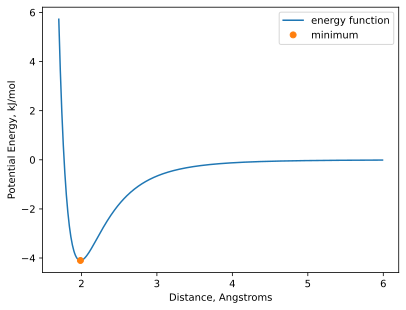

In [8]:
r = np.arange(1.7, 6, 0.01)
PE = PE_LJ(r)
plt.plot(r, PE, label='energy function')
plt.plot(opt.x, PE_LJ(opt.x), 'o', label='minimum')
plt.xlabel('Distance, Angstroms')
plt.ylabel('Potential Energy, kJ/mol')
plt.legend()

````{margin}
```{note}
Optimization functions can use algorithms with random components, so if they are run multiple times, variations in the results may be observed. The results typically vary only slightly, but sometimes more significant variations may be observed such as if there are multiple minima or maxima in the objective function.  
```
````

`````{admonition} How it works...
:class: seealso
The goal of optimization is to minimize the objective function which can be accomplished through a number of algorithms. Knowledge of these algorithms is not required to use optimization, but if you are curious, here is the view from 10,000 feet. Despite the wide variety of algorithms available, they generally operate by an almost trial-and-error approach. They start with initial input values for the objective function and then try slightly different input values. If the new input values decrease the objective function, they are accepted, and if they increase the objective function, they are rejected. This continues on for a number of iterations finding values that progressively decrease the objective function until the algorithm can no longer minimize the objective function any further. The final input values are then returned by the optimization function as the optimized values. Optimization algorithms can differ by, for example, how they decide which input values to try next or how different the subsequent input values to try should be. See [Further Reading](fr14) for more information on optimization algorithms.
`````

(14.1.2)=
### 14.1.2 Minimization for Maximization

```{index} maximization
```

The SciPy library does not contain any maximization functions, but maximization functions are not really necessary as minimizing the negative of a function provides the maximum. For example, below we have the radial probability function for the hydrogen 3s orbital. For convenience, the SymPy library's `sympy.physics` module is used to generate the 3s radial function ($\psi$, `psi`) as a Python function. For this maximization example, let's find the radius of maximum probability for the electron. The normalized probability can be calculated by $\psi ^2 r^2$ where $r$ is the distance from the nucleus.

Text(0, 0.5, 'Probability Density')

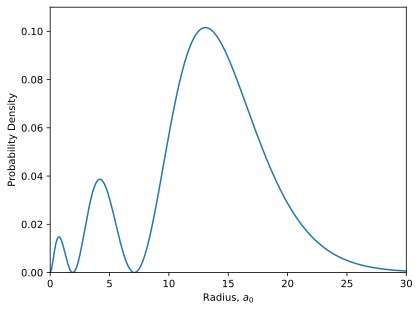

In [9]:
import sympy
from sympy.physics.hydrogen import R_nl
R = sympy.symbols('R')

psi_expr = R_nl(3, 0, R) # generate wave function using SymPy
psi = sympy.lambdify(R, psi_expr, 'numpy') # convert to a Python function

r = np.arange(0,40,0.1)
plt.plot(r, psi(r)**2 * r**2) # r is in bohrs (~0.529 anstroms)
plt.xlim(0,30)
plt.ylim(0,0.11)
plt.margins(x=0, y=0)
plt.xlabel('Radius, $a_0$')
plt.ylabel('Probability Density')

There are multiple ways to make the function negative like including a negative sign in the Python function definition. Our Python function has already been created, so below we will make the radial probability density negative using a `lambda` function (see [section 2.1.4](2.1.4) for review on lambda functions).

In [10]:
mx = optimize.minimize_scalar(lambda x: -psi(x)**2 * x**2)
mx

     fun: -0.014833612579485785
    nfev: 17
     nit: 13
 success: True
       x: 0.7400370693225894

```{index} constrained optimization
```

The value returned is the first local maximum but not the global maximum we are seeking. To ensure we get the global maximum, we need to add a constraint for the range of radii used by the optimization function. 

In [11]:
mx = optimize.minimize_scalar(lambda x: -psi(x)**2 * x**2,
                              bounds=(10,20), method='bounded')
mx

     fun: -0.10153431119853075
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 13.074031887574048

The global maximum is plotted as an orange dot below.

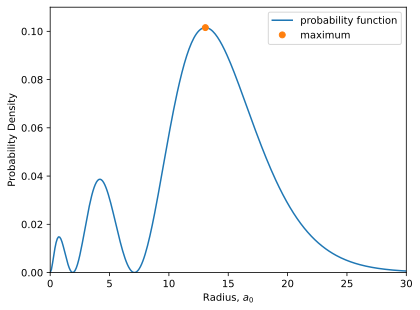

In [12]:
plt.plot(r, psi(r)**2 * r**2, label='probability function')
plt.plot(mx.x, psi(mx.x)**2 * mx.x**2, 'o', label='maximum')
plt.xlim(0,30)
plt.ylim(0,0.11)
plt.xlabel('Radius, $a_0$')
plt.ylabel('Probability Density')
plt.margins(x=0, y=0)
plt.legend()

(14.1.3)=
### 14.1.3 Multivarient Minimization

```{index} single: equilibrium; solving double equilibra
```
One of the key minimization functions in the `scipy.optimize` module is the `minimize()` function which is capable of minimizing multiple variables simultaneously. This function requires at least two arguments, the objective function and initial guesses for each value as a list or tuple.

~~~python
scipy.optimize.minimize(obj_func, (guess))
~~~

As an example, we will calculate the equilibrium concentrations for a tandem equilibrium shown below between three different isomers assuming we place an initial 122 mmol of the isomer A into solution and allow it to equilibrate at 25 $^o$C. The two equilibrium constants for this equilibrium are *K*$_1$=5.0 and *K*$_2$=0.80. 

$$ A {\stackrel{K_1}{\rightleftharpoons}} B {\stackrel{K_2}{\rightleftharpoons}} C$$

To solve this problem, we need to adjust the three isomer concentrations, our variables, such that they get as close as possible to the equilibrium ratios set by the equilibrium constants.

The first step is to write an objective function as a Python function, `obj_func()`, that quantifies how poor the solution is. It is the value from this function that we are minimizing to generate the optimal solution to our problem. Being that our goal is to bring the isomer quantities as close to the equilibrium ratios as possible, a reasonable objective function will calculate how far our isomer ratios are from equilibrium. The quality of our solution will be calculated from the squares of the difference between a proposed solution and the target equilibrium constants so that the further the proposed solution is from the target equilibrium values, the exponentially worse the quality of the solution will be evaluated as.

In [13]:
K1, K2 = 5.0, 0.80

def obj_func(guess):
    A, B, C = guess
    
    Q1 = B/A  # reaction quotient
    Q2 = C/B  # reaction quotient
    
    quality = (Q1 - K1)**2 + (Q2 - K2)**2
    
    return quality

Next, we provide the `minimize()` function both our objective function and an initial guess for the quantities A, B, and C. The initial guess needs to be a single collection such as a tuple, array, or list. The output of the `minimize()` function is again an `OptimizeResult` object with the `x` attribute accessing the minimized quantities for A, B, and C, respectively.

In [14]:
guess = (0.5, 0.25, 0.25)
equ = optimize.minimize(obj_func, guess)
equ

      fun: 9.425960678478094e-14
 hess_inv: array([[0.00320007, 0.01199286, 0.00510192],
       [0.01199286, 0.05824245, 0.02449791],
       [0.00510192, 0.02449791, 0.45818117]])
      jac: array([-5.53843956e-06,  3.65673058e-06, -1.14934890e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 8
     njev: 15
   status: 0
  success: True
        x: array([0.19166791, 0.95833958, 0.76667161])

To access the minimized values, use `equ.x` in this example. We can then verify the results by calculating the equilibrium values based on the calculated equilibrium quantities.

In [15]:
equ.x[1]/equ.x[0]

5.000000300515826

In [16]:
equ.x[2]/equ.x[1]

0.7999999371522047

Both values are in excellent agreement with $K_1$ and $K_2$ listed above. One step still remains to solve our problem. In the above problem, it is stated that we started with 122 mmol of isomer A, so if we take the sum of the quantities of A, B, and C, they need to equal 122.

In [17]:
np.sum(equ.x)

1.9166790941981806

They do not total to 122 mmol, so we need to scale the quantities up to a total of 122 mmol. Keep in mind that scaling up our values for A, B, and C will not change the ratios.

In [18]:
scale_factor = 122 / np.sum(equ.x)
scale_factor * equ.x

array([12.19999972, 61.00000228, 48.79999799])

The final equilibrium quanties for A, B, and C are 12.2, 61.0, and 48.8 mmol, respectively.

```{warning}
It is important to recognize that just because an optimization function generates an answer does not mean that it is indeed the correct answer for your problem. The generated answer is the optimization algorithm's best effort in producing the optimal result which may be, for example, a local minimum instead of the global minimum. If there is a way to verify the answer such as is done in the equilibrium example above, this is a prudent last step before using this information.
```

(14.2)=
## 14.2 Fitting Equations to Data

```{index} single: regression; curve fitting
```
```{index} residuals
```
An common application of optimization is fitting an equation to a series of data points such as a linear regression. While linear regression also  happens to have an analytical solution demonstrated in [section 8.3.3](8.3.3), we will solve it here using optimization. In the figure below, a regression line (solid orange) runs through the data points. The *residuals* are the difference between the regression line and the data points (green vertical dotted lines). The goal of linear regression is to generate a regression line that minimizes these residuals.

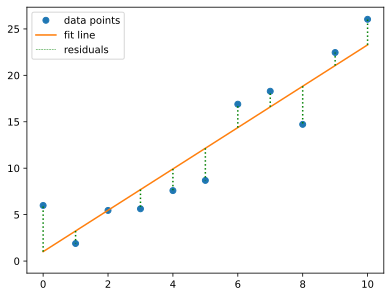

In [19]:
# code cell to generate figure but hidden in book using cell tags

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

np.random.seed(24)
x = np.arange(0,11)
y_noisy = 2.2*x + 2 + 3*np.random.randn(11)
a, b = np.polyfit(x, y_noisy, 1)
y = a*x + b

plt.plot(x,y_noisy, 'o', label='data points')
plt.plot(x,y, '-', label='fit line')

for coords in zip(x, y, y_noisy):
    plt.vlines(coords[0], coords[1], coords[2], colors='g', linestyles='dotted')
    
plt.plot(0,0, ls='--', lw=0.5, color='g', label='residuals')
plt.legend()
plt.show()

**Figure 1** An example of a line of best fit (solid orange) running through data points (blue) with residuals (green dashed) shown as the difference on the $y$-axis between the data point and linear regression.

```{index} least squares
```

One of the major questions in regression is how do we measure the quality of the fit. We could in principle use the total absolute sum of the residuals, known as the *lease absolute deviation* cost or objective function, but the commonly accepted objective function for fitting equations to data is *mean square error (MSE)* function. This is the average of the square of the difference between the equation's predictions and the actual data points, or another way of wording this is MSE is the average square residual of the fit line. The MSE equation is shown below where $f_i$ is the *y*-value from the regression line, $y_i$ is the data point *y*-value, and $N$ is the number of data points.
    
$$ MSE = \frac{1}{N} \sum_{i=1}^{N}{(f_i - y_i)^2} $$

There are two general types of regression: linear regression and nonlinear regression. The key difference is that the former fits data to a linear equation (or plane or hyperplane for higher dimensions) while the latter fits data to nonlinear equations.

(14.2.1)=
### 14.2.1 Linear Equations

```{index} single: linear equation solving; with optimization
```

There are numerous examples of linear equations in chemistry, and often when equations are nonlinear, they can be rearranged into a linear form. One classic example of a linear trend is the absorption of light being passed through a solution of colored analyte (i.e., material being quantified) with respect to the concentration of the analyte. This is related by Beer's law shown below where $A$ is absorption, $\epsilon$ is the molar absorptivity constant for a particular analyte, $b$ is path length of the sample, and $C$ is the concentration of analyte.

$$ A = \epsilon bC $$

Being that the path length for our instrument is 1 cm, which is quite common, this equation simplifies to the following.

$$ A = \epsilon C $$

By measuring the absorbance of multiple samples of analyte at known concentrations, the absorbance can be plotted with respect to concentration, and the slope of the linear trend is the molar absorptivity, $\epsilon$.

As our sample data, let's again use the copper cuprizone data we saw in chapter 8.

**Table 1** Beer-Lambert Law Data for Copper Cuprizone

|Concentration (10$^{-6}$ M) | Absorbance |
|:-------------------------: | :-------: |
|1.0 | 0.0154 |
| 3.0 | 0.0467 |
| 6.0 | 0.0930 |
| 15  | 0.2311 |
| 25  | 0.3925 |
| 35  | 0.5413 |


In [20]:
C = np.array([1.0e-06, 3.0e-06, 6.0e-06, 1.5e-05, 2.5e-05, 3.5e-05])
A = np.array([0.0154, 0.0467, 0.0930 , 0.2311, 0.3975, 0.5413])

The function we will use to fit this data is the `optimize.curve_fit()` function which performs a least-square minimization that fits an equation to the data provided. Despite this function being often described for fitting an equation to nonlinear data, this function is highly versatile and can fit both linear and nonlinear data. This function requires the theoretical equation, `func`, in the form of a Python function, the independent variable, `xdata`, and the dependent variable, `ydata`. The `curve_fit()` function also allows the user to optionally provide an initial guess for the equation variables/constants, `p0`. This can help speed up the process for more challenging problems and helps ensure the algorithm converges on a reasonable solution.

~~~python
optimize.curve_fit(func, xdata, ydata, p0=())
~~~

Below we have defined a Python function describing our equation that will be used to fit the data. The Python function used with `optimize.curve_fit()` requires that the first argument of the Python function must be the independent variable(s), and all the rest of the arguments are the parameters used to fit the equation to the data. In this case, these are the slope, $m$, and the *y*-intercept, $b$.

In [21]:
def lin_func(x, m, b):
    return m*x + b

The objective function is then provided to the `optimize.curve_fit()` function along with the data to fit. The `curve_fit()` function returns two arrays: the optimized parameters and the estimated covariance of the optimized parameters. We are only concerned with the optimized parameters right now, so we use the `__` junk variable to hold the covariance array.

In [22]:
const, __ = optimize.curve_fit(lin_func, C, A)
const

array([ 1.55886228e+04, -5.51831756e-06])

According to the `curve_fit()` function, the slope is 1.55 $\times$ 10$^4$ cm$^{-1}$M$^{-1}$ while the *y*-intercept is -5.45 $\times$ 10$^{-6}$.

(14.2.2)=
### 14.2.2 Nonlinear Regression

```{index} single: kinetics ; determine rate constants
```
```{index} curve fitting
```
```{index} nonlinear regression or curve fitting
```

Optimization can also be used to find the best fit for nonlinear data based off of a theoretical equation. One application of nonlinear fitting is to fit data to a theoretical rate law as a means of determining one or more rate constants in the equation. For this, we will again use the `curve_fit()` function from the `scipy.optimize` module.

To demonstrate this process, let's consider the two-step reaction of A + B $\rightarrow$ P catalyzed by a metal catalyst M.

$$ M + A \underset{k_{r1}}{\stackrel{k_1}{\rightleftharpoons}} MA $$
$$ MA + B \stackrel{k_2}\rightarrow P + M$$

The theoretical rate law for this two-step reaction is shown below.

$$ Rate = \frac{k_2k_1[M][A][B]}{k_{r1} + k_2[B]} $$

We need to again define the theoretical equation in the form of a Python function. Our function calculates the rate of the chemical reaction versus the concentration of B, but it would also work using data for rate versus the concentration of A depending upon what data you happen to have.

In [23]:
def frate(B, k1, kr1, k2):
    rate = (k2 * k1 * M * A * B)/(kr1 + k2 * B)
    return rate

For our example, we will generate some simulated data with random noise mixed in it. The values of our rate constants will be k$_1$=1.2, k$_{r2}$=0.48, k$_2$=4.29, and we will set [A] = 0.50 M and [M] = 1.2 $\times$ 10$^{-3}$ M. The concentrations of [A] and [M] are unchanged during the course of the rate measurement (e.g., using the method of initial rates).

In [24]:
np.random.seed(18)

In [25]:
M, A = 1.2e-3, 0.50

k1, kr1, k2 = 1.2, 0.48, 4.29

points = 20
conc = np.linspace(0.1, 8, points)
rate = frate(conc, k1, kr1, k2) + np.random.rand(points)/40000

Text(0, 0.5, 'Rate, M/s')

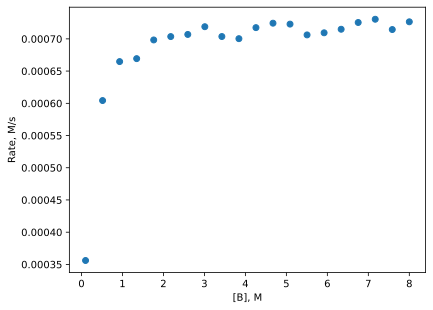

In [26]:
plt.plot(conc, rate, 'o')
plt.xlabel('[B], M')
plt.ylabel('Rate, M/s')

Now that we have our data, we can fit it to the theoretical equation to extract the rate constants.

In [27]:
const, __ = optimize.curve_fit(frate, conc, rate, bounds=(0, 5))
const

array([1.2212841 , 0.48435293, 4.51564707])

These rate constants are in good agreement with those used to generate the data. We can also plot the simulated data versus the rate equation generated by our curve fitting below.

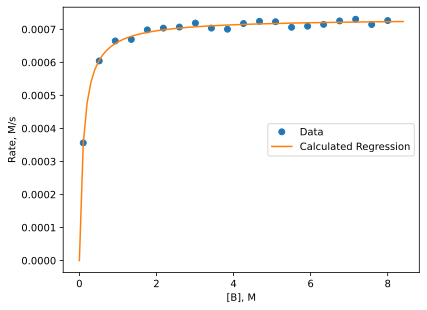

In [28]:
plt.plot(conc, rate, 'o', label='Data')

x = np.arange(0, 8.5, 0.1)
plt.plot(x, frate(x, const[0], const[1], const[2]), 
         '-', label='Calculated Regression')

plt.xlabel('[B], M')
plt.ylabel('Rate, M/s')
plt.legend(loc=7)

```{note}
If you are optimizing a function with multiple parameters, bounds are formatted with two lists or tuples. The first contains the lower bounds while the second contains the upper bounds as demonstrated below.
~~~python
bounds = ((a_low, b_low, c_low), (a_high, b_high, c_high))
optimize.curve_fit(func, xdata, ydata, bounds=bounds)
~~~
```

Another feature of the `optimize.curve_fit()` function is that it also accepts the uncertainty or errors in each data point. All regression examples seen so far in this book assume that each data point has the same level of uncertainty, but it is not uncommon for data to have different uncertainties. If your uncertainty varies, you can provide the `curve_fit()` function with the uncertainties as standard deviations to the `sigma=` argument as an array-like object (e.g., list, set, or NumPy array). When uncertainties are provided, data points with more uncertainty have less influence on the resulting regression than data points with less uncertainty. See the [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) documentation for more information and options.

In the example below, we will again fit concentration versus kinetic rate data from the above two-step chemical reaction. This time, we also have an array, `uncertainty`, that provides degrees of uncertainty for the rates.

In [29]:
uncertainty = [0.10e-6, 0.12e-6, 0.15e-6, 0.18e-6, 2.0e-6, 
               2.1e-6, 2.3e-6, 2.6e-6, 2.9e-6, 3.0e-6,
               3.0e-6, 3.1e-6, 2.9e-6, 3.5e-6, 3.9e-6,
               4.0e-6, 4.1e-6, 4.4e-6, 5.7e-6, 5.3e-6] # M/s

const, __ = optimize.curve_fit(frate, conc, rate, 
                               sigma = uncertainty, bounds=(0, 5))
const

array([1.21696215, 0.47300288, 4.49861921])

Comparing these constants to those calculated with the assumption of constant uncertainty, the values are similar but have a noticeable difference. The general rule is that the greater the *variation* in the uncertainties, the more the constants will differ from those derived with the assumption of constant uncertainty.

```{note}
Fitting data to a mathematical function can also be accomplished using the `optimize.least_squares()` function. The key difference between using `curve_fit()` and `least_squares()` is that the former accepts the theoretical equation and data directly while the latter requires a Python function that calculates the [residuals](14.2). Interestingly, the source code for the `curve_fit()` function calls the `least_squares()` function. We use the `curve_fit()` function here as it is more intuitive and convenient. 

There is another related function, `optimize.leastsq()`, that performs a similar operation but only uses the Levenberg-Marquardt algorithm and is described as legacy on the scipy.org website. The `optimize.least_squares()` function is more versatile and is likely the better choice of the two.
```

(14.2.3)=

### 14.2.3 Mixed Analyte Example

```{index} single: Beer's law; using optimization
```

Below is an additional example where we use optimization to determine the concentrations of three different dyes mixed together and analyzed by UV-Vis spectroscopy. This example was inspired by a *Journal of Chemical Education* article by [Jesse Maccione, Joseph Welch, and Emily C. Heider](https://doi.org/10.1021/acs.jchemed.9b00421). By Beer's law, the absorbance (A) of an analyte is the product of the molar absoptivity constant ($\epsilon$) for that analyte, the path length in cm ($b$), and concentration ($C$). 

$$ A = \epsilon bC $$

If there are multiple analytes in solution, the total absorbance (A$_{tot}$) is equal to the sum of the absorbances for the individual analytes. In our example, we will be dealing with a mixture of red, blue, and yellow dyes.

$$ A_{tot} = A_{red} + A_{blue} + A_{yellow} $$

We ultimately want concentrations of the dyes, so we can substitute in Beer's law for the three dye absorbances.

$$  A_{tot} = \epsilon_{red} bC_{red} + \epsilon_{blue} bC_{blue} + \epsilon_{yellow} bC_{yellow} $$

The path length is a constant that depends upon the instrument, and the molar absorptivity constants ($\epsilon$) are constants that depend upon the analytes and the wavelength we are measuring absorbances at. This means that for a particular set of dyes and instrument, the total absorbance ($A_{tot}$) depends upon the unknown concentrations of individual dyes. Because we have three unknowns, we need three equations to solve for the unknowns. This can be accomplished by measuring the absorbance and molar absorptivity at a minimum of three different wavelengths as demonstrated in [section 8.3.2](8.3.2). In this chapter, we will instead measure absorbances at *every* nanometer from 400 nm to 850 nm and allow the optimization function to fit the total absorbances by adjusting the individual dye concentrations.

````{margin}
```{warning}
While including more data points from the spectra can often lead to better results, using too many points can sometimes have the opposite effect due to overfitting noise. It is often best to select regions where there is the largest signal-to-noise ratio to avoid fitting too much noise.
```
````

First, we will import the absorbance data from the `food_coloring.csv` file using pandas and plot it to see what the data look like. In the CSV file, there are UV-Vis spectra for pure red, pure blue, pure yellow, and a mixture of the three.

In [30]:
!wget https://raw.githubusercontent.com/weisscharlesj/SciCompforChemists/master/notebooks/chapter_14/data/food_coloring.csv

--2023-04-14 15:33:30--  https://raw.githubusercontent.com/weisscharlesj/SciCompforChemists/master/notebooks/chapter_14/data/food_coloring.csv
Resolving ga.dp.tech (ga.dp.tech)... 10.255.255.41
Connecting to ga.dp.tech (ga.dp.tech)|10.255.255.41|:8118... connected.
Proxy request sent, awaiting response... 200 OK
Length: 14700 (14K) [text/plain]
Saving to: ‘food_coloring.csv.1’

food_coloring.csv.1 100%[===================>]  14.36K  --.-KB/s    in 0.04s   

2023-04-14 15:33:31 (382 KB/s) - ‘food_coloring.csv.1’ saved [14700/14700]



In [31]:
data = pd.read_csv('food_coloring.csv')
data.index = data['nm']
data.drop('nm', axis=1, inplace=True)

A_red = data['red_40']
A_yellow = data['yellow_6']
A_blue = data['blue_1']
A_mix = data['mix_1']

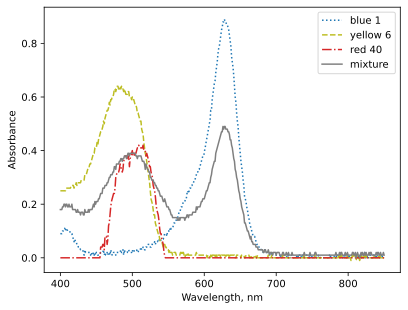

In [32]:
plt.plot(data.index, A_blue, c='C0', linestyle=':')
plt.plot(data.index, A_yellow, c='C8', linestyle='--')
plt.plot(data.index, A_red, c='C3', linestyle='-.')
plt.plot(data.index, A_mix, c='C7')
plt.xlabel('Wavelength, nm')
plt.ylabel('Absorbance')
plt.legend(['blue 1', 'yellow 6', 'red 40', 'mixture'])

Next, we will use the absorbances for each pure dye sample to find the molar absorptivities using Beer's law. The path length, $b$, in this instrument is 1 cm, and the concentrations are in molarity.

In [33]:
eps_red = A_red / 4.09e-5
eps_blue = A_blue / 5.00e-6
eps_yellow = A_yellow / 2.92e-5

Finally, we will write a Python function that calculates the total absorbance from the individual concentrations and molar absorptivities, and we will provide this function to the `optimize.curve_fit()` function. The fitting parameters are the calculated concentrations of the individual dyes.

In [34]:
def absorb(spec, C_red, C_blue, C_yellow):
    return eps_red * C_red + eps_blue * C_blue + eps_yellow * C_yellow

fit, __ = optimize.curve_fit(absorb, data.index, A_mix)
fit

array([1.44922873e-05, 2.84592011e-06, 1.26645031e-05])

The end result is that the red, blue, and yellow dyes have concentrations of 1.45 $\times$ 10$^{-5}$ M, 2.85 $\times$ 10$^{-6}$ M, and 1.27 $\times$ 10$^{-5}$ M.

Below is a quick demonstration on how to also solve this problem using the `optimize.lease_squares()` function. As mentioned earlier, both the `curve_fit()` and `least_squares()` functions can be used to solve the same problems. The `least_squares()` function requires a Python function that calculates the residuals (i.e., the difference between the calculated and measured absorbances) instead of the theoretical equation. This function also requires an initial guess for the fit parameters. Even if you don't know the concentrations, just give some reasonable value. In this case, we guessed 1 $\times$ 10$^{-3}$ M for each dye.

In [35]:
def residuals(X):
    C_red, C_blue, C_yellow = X
    A_calc = C_red * eps_red + C_blue * eps_blue + C_yellow * eps_yellow
    return A_mix - A_calc

lstsq = optimize.least_squares(residuals, (1e-3, 1e-3, 1e-3))
lstsq.x

array([1.44922873e-05, 2.84592011e-06, 1.26645031e-05])

The resulting concentrations for the three dyes appears identical (or nearly so) to those calculated by the `curve_fit()` function.

````{margin}
```{note}
The above approach assumes that the contribution of each dye is purely additive, so the contribution of each dye to the total absorbance is only a function of its own concentration. This means, for example, that the interaction of different dyes with each other in solution is assumed to be negligible.
```
````

(14.3)=
## 14.3 Root Finding

```{index} single: root finding; optimization
```

Root finding is the process of determining where a function equals zero, $f(a,b,...) = 0$. Being that any equation can be rearranged to equal zero, this is a versatile way of solving an equation. If the function is univariant, $f(a)=0$, this task may sometimes seem trivial even without optimization algorithms, but as the complexity of the equation or number of variables increases, using optimization algorithms can be beneficial.

Like the minimization functions above, there are two related versions of the root finding functions: `scipy.optimize.root()` and `scipy.optimize.root_scalar()`. The key difference is that the `root()` function can solve for both univariant and multivariant functions while `root_scalar()` can only solve for univariant functions. Both functions require a function, `func`, to find the root of, and `root()` function also requires an initial guess, `x0`. The `root_scalar()` function also allows for an optional range of values that bracket the root, `bracket=` to be provides by the user.

~~~python
scipy.optimize.root(func, x0)
scipy.optimize.root_scalar(func, bracket=(start, stop))
~~~

As a root finding example, we can locate the nodes in a radial wave function for the hydrogen 3s orbital. Because there is only one variable, $r$, we can use the `scipy.optimize.root_scalar()` function. Below, we first define our radial wave function as a Python function, `orbital_3s`.

In [36]:
def orbital_3s(r):
    wf = (2/27)*np.sqrt(3)*(2*r**2/9 - 2*r + 3)* np.exp(-r/3)
    return wf

Before we find the roots, let's visualize the function to see what we are dealing with. The horizontal dotted line at *y* = 0 is provided as a visual guide. The roots are located where the solid line of the wave function intersects with the dotted line.

Text(0, 0.5, '$\\psi$')

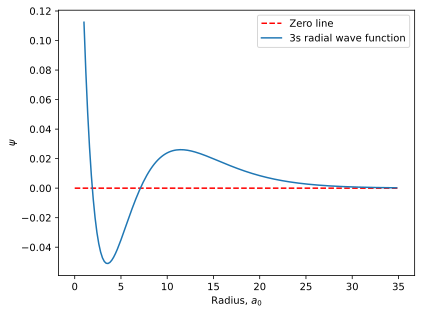

In [37]:
r = np.arange(1, 35, 0.2)
psi_3s = [orbital_3s(num) for num in r]

plt.hlines(0, 0, 35, 'r', linestyles='--', label='Zero line')
plt.plot(r, psi_3s, '-', label='3s radial wave function')
plt.legend()
plt.xlabel('Radius, $a_0$')
plt.ylabel('$\psi$')

The function has two nodes, so our `bracket=` values will determine which we will end up
solving for.

In [38]:
node1 = optimize.root_scalar(orbital_3s, bracket=[0, 3])
node1

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.901923788646684

In [39]:
node2 = optimize.root_scalar(orbital_3s, bracket=[5, 10])
node2

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 7.098076211353316

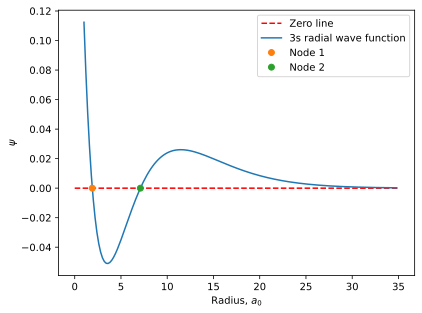

In [40]:
r = np.arange(1, 35, 0.2)
psi_3s = [orbital_3s(num) for num in r]

plt.hlines(0, 0, 35, 'r', linestyles='--', label='Zero line')
plt.plot(r, psi_3s, '-', label='3s radial wave function')
plt.plot(node1.root, orbital_3s(node1.root), 'o', label='Node 1')
plt.plot(node2.root, orbital_3s(node2.root), 'o', label='Node 2')
plt.xlabel('Radius, $a_0$')
plt.ylabel('$\psi$')
plt.legend()

The two dots above show the location of the two roots for this function which clearly are located on the nodes of the wave function.

(fr14)=
## Further Reading

1. The `scipy.optimize` module user guide. https://docs.scipy.org/doc/scipy/tutorial/optimize.html (free resource)
2. Watt, J.; Borhani, R.; Katsaggelos, A. K. Machine Learning Refined: Foundations, Algorithms, and Applications; 2nd ed.; Cambridge University Press, 2020, pp 21-124. These chapters are a good introduction to optimization algorithms.

## Exercises

Solve the following problems using Python in a Jupyter notebook and functions from the `scipy.optimize` module. Any data file(s) refered to in the problems can be found in the [data](https://github.com/weisscharlesj/SciCompforChemists/tree/master/notebooks) folder in the same directory as this chapter's Jupyter notebook. Alternatively, you can download a zip file of the data for this chapter from [here](https://github.com/weisscharlesj/data_SciCompforChem) by selecting the appropriate chapter file and then clicking the **Download** button.

```{index} blackbody radiation
```
```{index} Plank's law
```
1. A warm or hot object emits radiation in a range of wavelengths described by Plank's law shown below where B is radiance, $\lambda$ is frequency of radiation, $c$ is the speed of light, $h$ is Plank's constant, $k$ is Boltzmann's constant, and $T$ is temperature of the object in K.

    $$ B(\lambda) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda kT}}-1} $$ 
    
    Determine the wavelength of greatest radiance for an object at 5000 K using a minimization function. Hint: be sure to include an extra negative sign in the Python function that you define, and you will want to use either bounds or brackets to prevent the minimization function from trying zero and generating a `ZeroDivisionError`.

2. The three isomers of ethyltoluene (i.e., *ortho*-, *meta*-, and *para*-) interchange under Friedel-Crafts conditions facilitated by aluminum chloride. An investigation into this isomer equilibrium by [Allen, R. H. et al.](https://doi.org/10.1021/ja01503a026) experimentally determined the rate constants for the interconversion of these isomers. Using the rate constant data, the following equilibrium constants were calculated: *K*$_{om}$=7.2, *K*$_{pm}$=2.47, and *K*$_{op}$=2.9 where each equilibrium constant is defined below.

    $$ K_{om}=\frac{[meta]}{[ortho]}, \quad K_{pm}=\frac{[meta]}{[para]}, \quad K_{op}={\frac{[para]}{[ortho]}}  $$

    Using this information, calculate the percentages of each isomer at equilibrium. Compare your percentage to those provided in the above paper (in the abstract).

3. A sealed piston contains 0.32 moles of helium gas at 298 K. Determine the value of $R$ by performing a nonlinear fit on the data below with the `optimize.curve_fit()` function and the ideal gas law.

    ```{index} gas law
    ```

    $$ P = \frac{nRT}{V} $$
    
    | Volume (L) | Pressure (atm) |
    |:----------:|:--------------:|
    | 0.401       | 21.8           |  
    | 0.701       | 11.3           |
    | 1.22        | 5.17           |
    | 1.80        | 5.49           |
    | 2.39        | 3.86           |
    | 2.83        | 4.34           |
    | 3.09        | 2.72           |


4. Below is the theoretical kinetic rate law for a chemical reaction of A $\rightarrow$ P catalyzed by 0.001 M of a metal catalyst M. The table includes kinetic data for the rate, concentration of A, and the uncertainty in rate. Use the `optimize.curve_fit()` function to determine values for $k_1$ and $K_{eq}$. Plot the data below with an overlay of calculated values using the constants that you determined to show that they are reasonable values.

    $$ Rate = \frac{k_1K_{eq}[A][M]}{1 + K_{eq}[A]} $$
    
    | Rate, M/s | [A], M | Rate Uncertainty, M/s |
    |:---------:|:------:|:---------------------:|
    | 2.18e-06  | 0.01   |  0.11e-6  |
    | 1.72e-05  | 0.71   |  0.12e-6  |
    | 2.75e-05  | 1.43   |  0.25e-6  |
    | 4.36e-05  | 2.14   |  0.40e-6  |
    | 5.23e-05  | 2.86   |  0.50e-6  |
    | 5.23e-05  | 3.57   |  1.0e-6   |
    | 6.71e-05  | 4.29   |  1.5e-6   |
    | 6.26e-05  | 5.00   |  1.8e-6   |

    ```{index} single: equilibrium ; solving with polynomials
    ```

5. One method of solving acid-base equilibrium concentrations is through polynomials as demonstrated by [F. Bamdad](https://doi.org/10.1021/ed081p758). Below is a third-degree polynomial from the equilibria resulting from placing hydrocyanic acid (HCN) in water where $x$ is the concentration of hydronium, *K*$_a$ is the acid equilibrium constant, *K*$_w$ is equilibrium constant for the autoionization of water, and HCN$_0$ is the initial concentration of hydrocyanic acid. Solve for the concentration of hydronium using a root finding algorithm in the `scipy.optimize` module assuming HCN$_0$ = 6.8 $\times$ 10$^{-6}$ M and K$_a$ = 6.2 $\times$ 10$^{-10}$.

    $$ x^3 + K_a x^2 + (K_w + [HCN]_0K_a)x - K_wK_a = 0 $$

    ```{index} van der Waals equation
    ```
6. The van der Waals equation is a modified form of the ideal gas law but includes two correction factors that account for intermolecular forces and the volume of gas molecules. These correction factors include constants $a$ and $b$ which are gas-dependent, and the values of $a$ and $b$ can be calculated by fitting the van der Waals equation to pressure versus volume data. 

    $$ \left(P + a\frac{n^2}{V^2} \right) (V - nb) = nRT $$ 

    Load the file `PV_CO.csv` containing pressure and volume data for one mole of carbon monixide at 298 K acquired from the [NIST Chemistry WebBook](https://webbook.nist.gov/chemistry/). Fit the van der Waals equation to this data set to determine $a$ and $b$ values for carbon monoxide.